In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/trump_truths_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   account_name          5159 non-null   object 
 1   account_handle        5159 non-null   object 
 2   verified_badge        5159 non-null   bool   
 3   post_date             5159 non-null   object 
 4   profile_link          5158 non-null   object 
 5   avatar_url            5159 non-null   object 
 6   post_url              4398 non-null   object 
 7   status_text           4240 non-null   object 
 8   replies               5159 non-null   object 
 9   shares                5159 non-null   object 
 10  likes                 5159 non-null   object 
 11  video_urls/0          0 non-null      float64
 12  image_urls/0          1292 non-null   object 
 13  video_urls/0/url      994 non-null    object 
 14  video_urls/0/quality  994 non-null    object 
 15  video_urls/1/url     

In [3]:
df.head().transpose()

,0,1,2,3,4
account_name,Donald J. Trump,Donald J. Trump,Donald J. Trump,Donald J. Trump,Donald J. Trump
account_handle,realDonaldTrump,realDonaldTrump,realDonaldTrump,realDonaldTrump,realDonaldTrump
verified_badge,True,True,True,True,True
post_date,2024-11-08 10:05:00,2024-11-07 21:56:00,2024-11-07 21:56:00,2024-11-07 21:56:00,2024-11-07 21:55:00
profile_link,https://truthsocial.com/@realDonaldTrump,https://truthsocial.com/@realDonaldTrump,https://truthsocial.com/@realDonaldTrump,https://truthsocial.com/@realDonaldTrump,https://truthsocial.com/@realDonaldTrump
avatar_url,https://static-assets-1.truthsocial.com/tmtg:p...,https://static-assets-1.truthsocial.com/tmtg:p...,https://static-assets-1.truthsocial.com/tmtg:p...,https://static-assets-1.truthsocial.com/tmtg:p...,https://static-assets-1.truthsocial.com/tmtg:p...
post_url,https://truthsocial.com/@realDonaldTrump/posts...,https://truthsocial.com/@realDonaldTrump/posts...,https://truthsocial.com/@realDonaldTrump/posts...,https://truthsocial.com/@realDonaldTrump/posts...,https://truthsocial.com/@realDonaldTrump/posts...
status_text,"There are fake, untrue, and probably illegal r...",NaN,NaN,NaN,NaN
replies,429,"4,29k","1,11k","2,85k",623
shares,"1,41k","9,58k","6,64k","13,3k","4,31k"


In [4]:
# find all NaN columns
nan_columns = df.columns[df.isna().any()].tolist()

# Display the columns with NaN values
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['profile_link', 'post_url', 'status_text', 'video_urls/0', 'image_urls/0', 'video_urls/0/url', 'video_urls/0/quality', 'video_urls/1/url', 'video_urls/1/quality', 'video_urls/2/url', 'video_urls/2/quality', 'image_urls/1', 'image_urls/2', 'image_urls/3', 'video_urls/3/url', 'video_urls/3/quality', 'video_urls/4/url', 'video_urls/4/quality']


In [5]:
# Display the count of NaNs for each column
print(df.isna().sum())

account_name               0
account_handle             0
verified_badge             0
post_date                  0
profile_link               1
avatar_url                 0
post_url                 761
status_text              919
replies                    0
shares                     0
likes                      0
video_urls/0            5159
image_urls/0            3867
video_urls/0/url        4165
video_urls/0/quality    4165
video_urls/1/url        4409
video_urls/1/quality    4409
video_urls/2/url        4941
video_urls/2/quality    4941
image_urls/1            5075
image_urls/2            5098
image_urls/3            5103
video_urls/3/url        5130
video_urls/3/quality    5130
video_urls/4/url        5138
video_urls/4/quality    5138
dtype: int64


In [6]:
unique_status_texts = df['status_text'].dropna().unique()

# Print each unique value in a readable way
# for idx, status in enumerate(unique_status_texts, 1):
#     print(f"{idx}. {status}\n")

# Get the number of unique values
count_unique = len(unique_status_texts)
print(f"Count of unique non-null values in 'status_text': {count_unique}")

Count of unique non-null values in 'status_text': 3717


In [7]:
## Remove all the columns where there are NaNs for 50% of the total dataset

In [8]:
# Define a threshold as 50% of the total number of rows
threshold = 0.5

# Calculate the number of non-null values per column
non_null_counts = df.notna().sum()

# Calculate the threshold value for each column
total_rows = df.shape[0]
threshold_value = total_rows * threshold

# Select columns that meet the threshold criteria (i.e., columns with fewer than 50% missing data, will be ignored)
columns_to_keep = non_null_counts[non_null_counts >= threshold_value].index

# Create a new DataFrame with only the columns that meet the threshold
df_sliced = pd.DataFrame(df[columns_to_keep])

# Display the new DataFrame without the dropped columns
print(df_sliced.shape)

(5159, 11)


In [9]:
nan_columns_data_cleaned = df_sliced.columns[df_sliced.isna().any()].tolist()
print(nan_columns_data_cleaned)

['profile_link', 'post_url', 'status_text']


In [10]:
df_sliced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   account_name    5159 non-null   object
 1   account_handle  5159 non-null   object
 2   verified_badge  5159 non-null   bool  
 3   post_date       5159 non-null   object
 4   profile_link    5158 non-null   object
 5   avatar_url      5159 non-null   object
 6   post_url        4398 non-null   object
 7   status_text     4240 non-null   object
 8   replies         5159 non-null   object
 9   shares          5159 non-null   object
 10  likes           5159 non-null   object
dtypes: bool(1), object(10)
memory usage: 408.2+ KB


In [11]:
# Display the count of NaN's from each column
print(df_sliced.isna().sum())

account_name        0
account_handle      0
verified_badge      0
post_date           0
profile_link        1
avatar_url          0
post_url          761
status_text       919
replies             0
shares              0
likes               0
dtype: int64


In [12]:
# drop NaN's from status_text as this is a significant column for further processing. 
df_sliced = df_sliced.dropna(subset=['status_text'])
df_sliced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 0 to 5158
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   account_name    4240 non-null   object
 1   account_handle  4240 non-null   object
 2   verified_badge  4240 non-null   bool  
 3   post_date       4240 non-null   object
 4   profile_link    4240 non-null   object
 5   avatar_url      4240 non-null   object
 6   post_url        3590 non-null   object
 7   status_text     4240 non-null   object
 8   replies         4240 non-null   object
 9   shares          4240 non-null   object
 10  likes           4240 non-null   object
dtypes: bool(1), object(10)
memory usage: 368.5+ KB


In [13]:
# print the count of NaN's from df_sliced to make sure that status_text column does not have any NaN
print(df_sliced.isna().sum())

account_name        0
account_handle      0
verified_badge      0
post_date           0
profile_link        0
avatar_url          0
post_url          650
status_text         0
replies             0
shares              0
likes               0
dtype: int64


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mannurul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mannurul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mannurul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove punctuation (e.g., . , ! ? etc.)
    words = [word for word in words if word not in string.punctuation]

    # Remove words that are not alphabetic (e.g., numbers, special characters)
    words = [word for word in words if word.isalpha()]
    
    # Remove stopwords (common words like "the", "and", etc.)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization: reduce words to their root form (e.g., "running" -> "run")
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    return ' '.join(words)

In [17]:
# Apply preprocessing to the 'status_text' column
df_sliced['processed_text'] = df_sliced['status_text'].apply(preprocess_text)
df_sliced['processed_text']

0       fake untrue probably illegal rumor statement m...
6       california hour poll open pm local line cutoff...
7       nevada hour poll open pm line cutoff must let ...
8       montana hour poll open pm line cutoff must let...
9                                           hi republican
                              ...                        
5154                                                 http
5155    congresswoman julia letlow fantastic job repre...
5156    evan gershkovich reporter wall street journal ...
5157    usual democrat pushed misinformation failed th...
5158    deranged jack smith together team political ha...
Name: processed_text, Length: 4240, dtype: object

In [18]:
# Define keywords for each category
positive_keywords = ['good', 'great', 'happy', 'excellent', 'positive', 'amazing', 'love']
negative_keywords = ['bad', 'poor', 'sad', 'horrible', 'negative', 'terrible', 'hate']

In [19]:
# Apply a function to check for positive, negative, or neutral text
def categorize_sentiment(text):
    # Convert text to lowercase for case insensitive matching
    text = text.lower()
    
    # Check if any positive keyword is in the text
    if any(word in text for word in positive_keywords):
        return 1  # Positive sentiment
    
    # Check if any negative keyword is in the text
    elif any(word in text for word in negative_keywords):
        return -1  # Negative sentiment
    
    # If no positive or negative keywords, classify as neutral
    return 0  # Neutral sentiment

In [20]:
# Will use status_text as target column
df_sliced['target'] = df_sliced['status_text'].apply(categorize_sentiment)

# Check the unique values in the 'target' column
df_sliced['target'].unique()

array([ 1,  0, -1])

In [21]:
# 1. Preprocess text column as before
X_text = df_sliced['processed_text']  # The preprocessed text

# 2. Convert 'replies', 'shares', 'likes' to numeric (handling missing values as 0)
df_sliced['replies'] = pd.to_numeric(df_sliced['replies'], errors='coerce').fillna(0)
df_sliced['shares'] = pd.to_numeric(df_sliced['shares'], errors='coerce').fillna(0)
df_sliced['likes'] = pd.to_numeric(df_sliced['likes'], errors='coerce').fillna(0)

# 3. Convert 'verified_badge' to binary (0 or 1)
df_sliced['verified_badge'] = df_sliced['verified_badge'].astype(int)

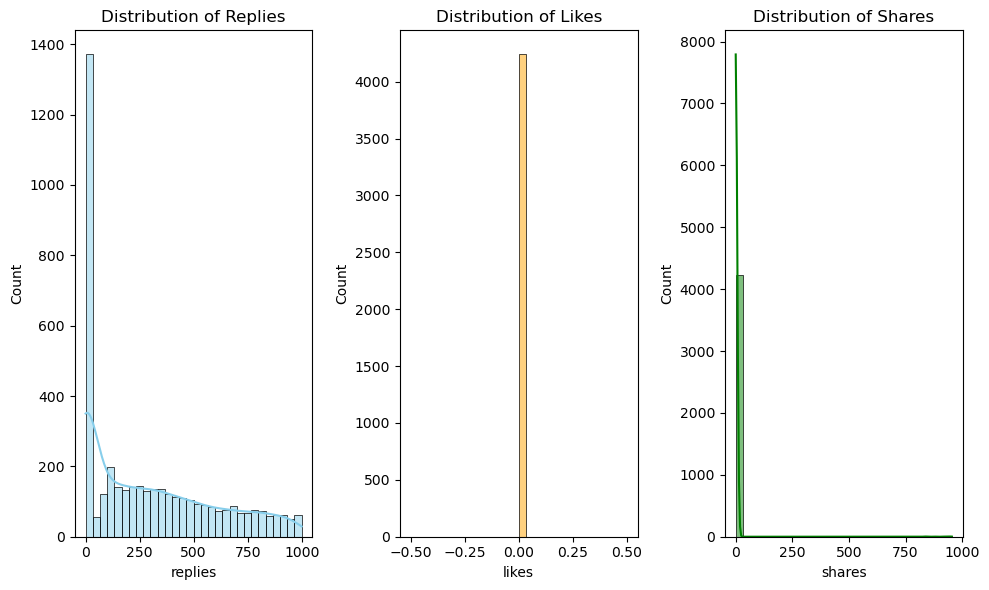

In [22]:
# Plot histogram for 'replies', 'likes', and 'shares'
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_sliced['replies'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Replies')

plt.subplot(1, 3, 2)
sns.histplot(df_sliced['likes'], kde=True, color='orange', bins=30)
plt.title('Distribution of Likes')

plt.subplot(1, 3, 3)
sns.histplot(df_sliced['shares'], kde=True, color='green', bins=30)
plt.title('Distribution of Shares')

plt.tight_layout()
plt.show()

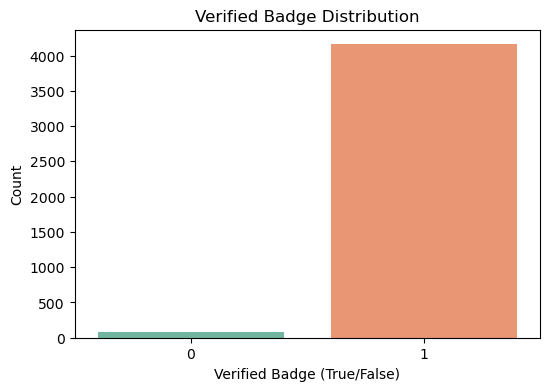

In [23]:
# Plot bar chart for 'verified_badge'
plt.figure(figsize=(6, 4))
sns.countplot(x='verified_badge', data=df_sliced, palette='Set2')
plt.title('Verified Badge Distribution')
plt.xlabel('Verified Badge (True/False)')
plt.ylabel('Count')
plt.show()

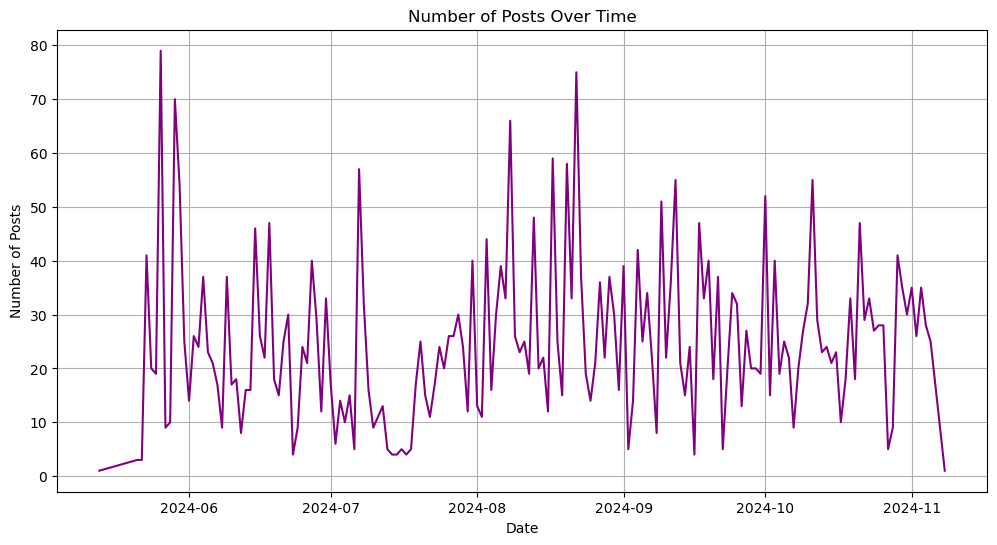

In [24]:
# Convert 'post_date' to datetime
df_sliced['post_date'] = pd.to_datetime(df_sliced['post_date'], errors='coerce')

# Plot number of posts over time
plt.figure(figsize=(12, 6))
df_sliced.groupby(df_sliced['post_date'].dt.date).size().plot(kind='line', color='purple')
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

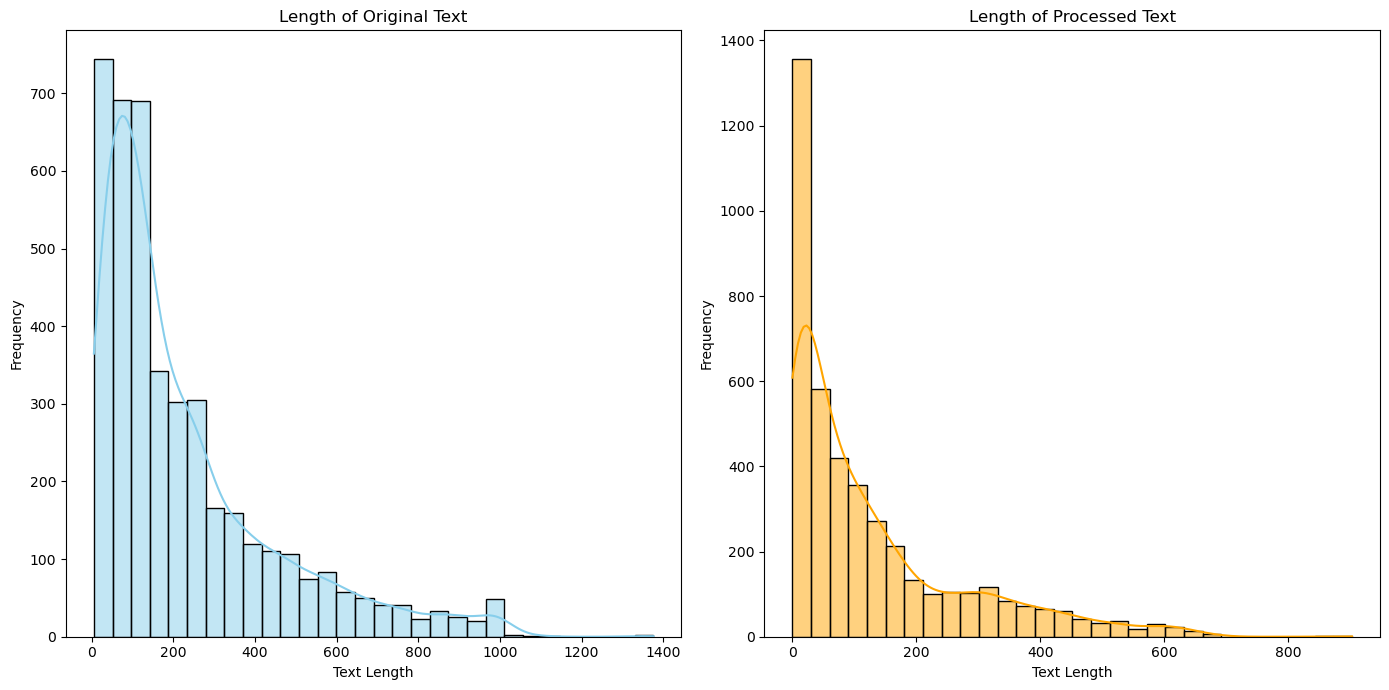

In [25]:
# Create new columns for the length of the text
df_sliced['status_text_length'] = df_sliced['status_text'].apply(len)
df_sliced['processed_text_length'] = df_sliced['processed_text'].apply(len)

# Plot the length distribution for both original and processed text
plt.figure(figsize=(14, 7))

# Original text length
plt.subplot(1, 2, 1)
sns.histplot(df_sliced['status_text_length'], kde=True, color='skyblue', bins=30)
plt.title('Length of Original Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Processed text length
plt.subplot(1, 2, 2)
sns.histplot(df_sliced['processed_text_length'], kde=True, color='orange', bins=30)
plt.title('Length of Processed Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'processed_text' into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_text_tfidf = tfidf.fit_transform(X_text).toarray()

# Now, let's combine the text features with the other numerical features
X_combined = np.hstack((X_text_tfidf, df_sliced[['replies', 'shares', 'likes', 'verified_badge']].values))


In [27]:
# Split data into training and testing sets
y = df_sliced['target']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train a Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [29]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.42      0.60        33
           0       0.95      0.99      0.97       626
           1       0.98      0.93      0.95       189

    accuracy                           0.96       848
   macro avg       0.98      0.78      0.84       848
weighted avg       0.96      0.96      0.95       848



In [128]:
df_test = pd.DataFrame({
    'original_text': df_sliced.loc[y_test.index, 'status_text'],  # Original status text
    'processed_text': df_sliced.loc[y_test.index, 'processed_text'],  # Preprocessed text
    'true_target': y_test,  # True target values from the test set
    'predicted_target': y_pred  # Predicted target values from the model
})

# Adjust pandas display options for better visibility
pd.set_option('display.max_colwidth', None)  # Display full text in each column
pd.set_option('display.max_rows', None)      # Show all rows (use cautiously)
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 1000)          # Increase display width

# Display the DataFrame
df_test.head()

,original_text,processed_text,true_target,predicted_target
1614,"Illegal Migrants who are POURING INTO OUR COUNTRY, in record numbers, are taking the JOBS away from Black and Hispanic people who have held them for years. It is devastating for the Black and Hispanic patriots of our Nation. These jobs are not replaceable, and never will be because, under Comrade Kamala Harris, the Border will be WIDE OPEN and there will always be more people coming in, many of them terrorists and criminals, than jobs available. KAMALA IS KILLING BLACK AND HISPANIC HERITAGE, SHE IS KILLING THEIR LEGACY AND THEIR RIGHTS. REGISTER AND VOTE FOR YOUR ALL TIME FAVORITE PRESIDENT, ME. NOVEMBER 5TH WILL BE THE MOST IMPORTANT DAY IN THE HISTORY OF OUR COUNTRY. MAKE AMERICA GREAT AGAIN!",illegal migrant pouring country record number taking job away black hispanic people held year devastating black hispanic patriot nation job replaceable never comrade kamala harris border wide open always people coming many terrorist criminal job available kamala killing black hispanic heritage killing legacy right register vote time favorite president november important day history country make america great,1,1
1713,https://rumble.com/v5ejx23-live-president-trump-in-tucson-az.html,http,0,0
3008,DAY 1 @realDonaldTrump,day realdonaldtrump,0,0
1348,"After almost four years, Border Czar Kamala Harris has decided, for political reasons, that it’s time for her to go to our broken Southern Border. What a disgrace that she waited so long, allowing millions of people to enter our Country from prisons, mental institutions, and criminal cells all over the World, not just South America, many of those coming are terrorists, and at a level never seen before! She’s trying to con the public like she did a good job at the Border when, in fact, she has destroyed the very fabric of our Nation allowing 21 Million people in from places unknown….",almost four year border czar kamala harris decided political reason time go broken southern border disgrace waited long allowing million people enter country prison mental institution criminal cell world south america many coming terrorist level never seen trying con public like good job border fact destroyed fabric nation allowing million people place,1,1
5055,"Rob Wittman is an incredible representative for the great people of Virginia’s 1st Congressional District. Rob is fighting to protect our Amazing Veterans, Rebuild our Military, Grow our Economy, Lower Inflation, and Defend our always under siege Second Amendment. Rob Wittman has my Complete and Total Endorsement!",rob wittman incredible representative great people virginia congressional district rob fighting protect amazing veteran rebuild military grow economy lower inflation defend always siege second amendment rob wittman complete total endorsement,1,1


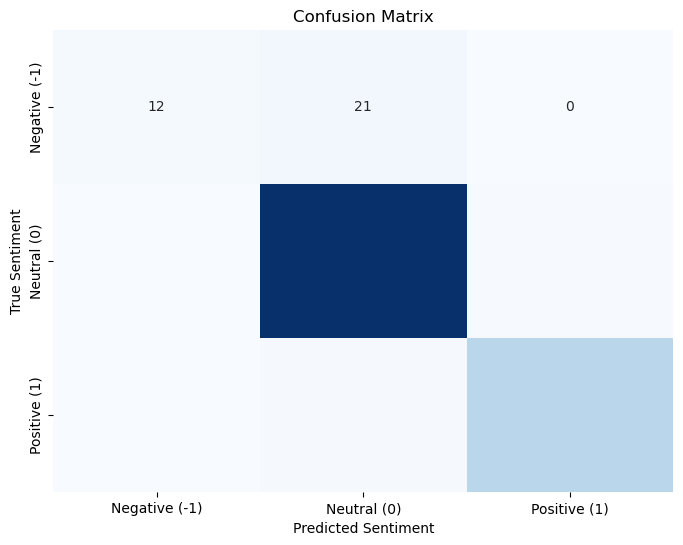

In [130]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df_test['true_target'], df_test['predicted_target'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'], 
            yticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

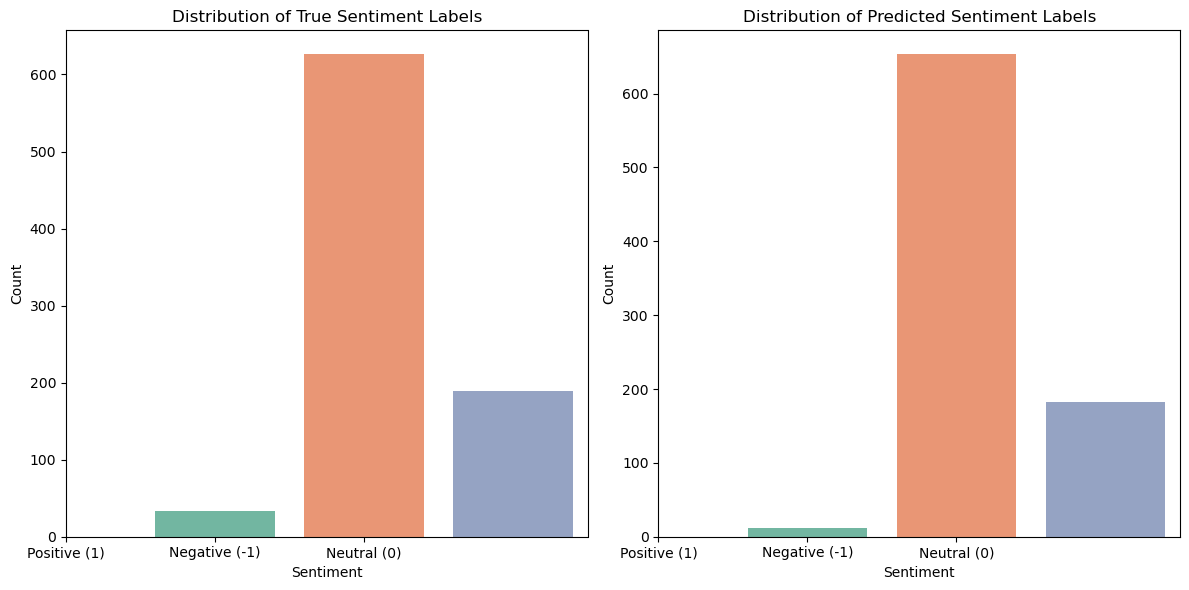

In [131]:
# Plot the distribution of true and predicted sentiment labels
plt.figure(figsize=(12, 6))

# True sentiment label distribution
plt.subplot(1, 2, 1)
sns.countplot(x='true_target', data=df_test, palette='Set2')
plt.title('Distribution of True Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, -1], ['Negative (-1)', 'Neutral (0)', 'Positive (1)'])

# Predicted sentiment label distribution
plt.subplot(1, 2, 2)
sns.countplot(x='predicted_target', data=df_test, palette='Set2')
plt.title('Distribution of Predicted Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, -1], ['Negative (-1)', 'Neutral (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

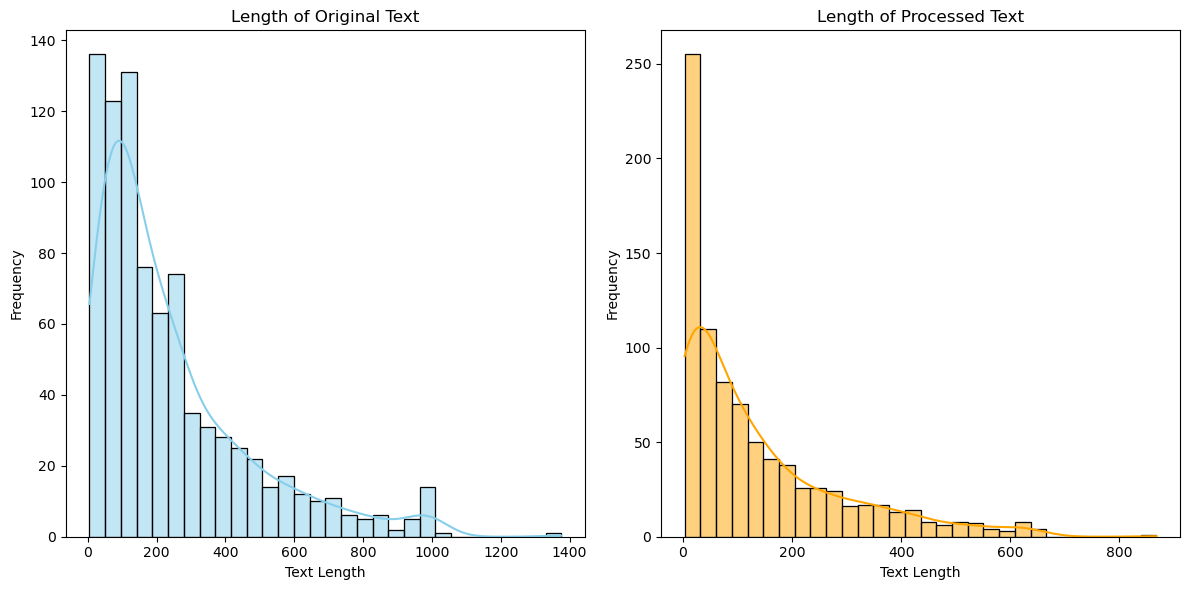

In [132]:
# Create a new column for the length of text
df_test['original_text_length'] = df_test['original_text'].apply(len)
df_test['processed_text_length'] = df_test['processed_text'].apply(len)

# Plot the text length distribution
plt.figure(figsize=(12, 6))

# Original text length
plt.subplot(1, 2, 1)
sns.histplot(df_test['original_text_length'], kde=True, color='skyblue', bins=30)
plt.title('Length of Original Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Processed text length
plt.subplot(1, 2, 2)
sns.histplot(df_test['processed_text_length'], kde=True, color='orange', bins=30)
plt.title('Length of Processed Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()